# Análise Exploratória de Dados

## 1. Importando bibliotecas

In [118]:
import pandas as pd
import numpy as np

# Visualização
# !pip install bokeh
# from bokeh.plotting import figure, show, output_file
# from bokeh.io import output_notebook
# from bokeh.models import Legend, LegendItem, LassoSelectTool, HoverTool

# output_notebook()

# !pip install seaborn plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 2. Carregando os dados

In [10]:
caminho = 'https://media.githubusercontent.com/media/Ciencia-de-Dados-IMT-2023/Datasets/main/Spotify-EDA/df_musics.csv'

df = pd.read_csv(caminho)
display(df.sample(5))

,id,id_album,id_artist,name,explicit,duration_ms,popularity,acousticness,danceability,energy,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
12569,73V6cuFASuzoYUrCFnD07J,3fPVpa5c6VFluIWqn176sV,02kJSzxNuaWGqwubyUba0Z,Buddha (feat. Smokepurpp),True,193226,37,0.341000,0.745,0.543,...,Step Brothers,49,2017-04-11,4,album,G-Eazy,rap,75,artist,5168621
6046,0BKmVgUMJGjlPB4nJRECEH,5C6qgQe4ptUERFZjACINy4,0bdfiayQAKewqEvaU6rXCv,Waste of Time - Jungle Remix,False,246160,40,0.700000,0.655,0.562,...,Waste of Time,34,2013-07-07,3,album,MØ,pop,70,artist,1434979
18450,6utNwjJgCT1DPpir6HIj0r,6R4nEyw3YQ5HhQ4Gpbphfv,06HL4z0CvFAxyc27GXpf02,Love Story - POP mix,False,234200,0,0.042100,0.724,0.756,...,Just The Hits,0,2010-01-01,21,album,Taylor Swift,pop,100,artist,75109593
18677,0ooD3TYlFHlShO5Pc4LXhT,56PJDByaunMWwCqs5rV3Nc,6oMuImdp5ZcFhWP0ESe6mG,First 48,True,198077,0,0.130000,0.819,0.760,...,No Label II,1,2014-06-03,20,album,Migos,rap,77,artist,13186523
16286,4AQrRZMo8yMNaeAkOnM2xm,6a5n1Frj3nxGcyTqT1xfrg,1w5Kfo2jwwIPruYS2UWh56,Deep - Brendan O'Brien Mix,False,257786,25,0.000043,0.162,0.889,...,Ten Redux,47,1991-08-27,17,album,Pearl Jam,rock,75,artist,8215211


## 3. Tratar os Dados (Análise Quantitativa)

1. Excluir informações não relevantes
2. Tratar tipos da colunas
3. Tratar colunas com todos os valores vazios

### 3.1 Excluir informações não relevantes

In [3]:
print(df.columns)

Index(['id', 'id_album', 'id_artist', 'name', 'explicit', 'duration_ms',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'album_name',
       'album_popularity', 'album_release_date', 'album_total_tracks',
       'album_type', 'artist_name', 'artist_genres', 'artist_popularity',
       'artist_type', 'artist_followers'],
      dtype='object')


In [4]:
# Mantém uma base com os IDs e o nome das músicas
colunas_ids = ['id', 'id_album', 'id_artist', 'name']

df_ids = df.loc[:, colunas_ids]
display(df_ids.sample(5))

,id,id_album,id_artist,name
25383,69f1steoIMhN1skPkBR6rB,4M75DELxOCrwiPPbIQ46Cz,0f5nVCcR06GX8Qikz0COtT,Distance
1665,6kex4EBAj0WHXDKZMEJaaF,2e5CxfyEwBW115beiwh7Mc,7c0XG5cIJTrrAgEC3ULPiq,Swalla (feat. Nicki Minaj & Ty Dolla $ign)
24431,3b3SSIcnE9a77XoUEtG5Jm,6aCr3UaB8lM9g6TtFB3qwd,6l3HvQ5sa6mXTsMTB19rO5,The Pessimist (feat. J. Cole)
28500,2eNSieyqDoZMa3yOSagR4q,7BtkpIm8Gm50ocm8l2Iu5V,5Rzqmz1zAszembFHGZQuAt,Step To My Girl
28235,2gsWiAyssTMQS31PJ2Ih1K,6wdSf72duVewXTqhYU3Z87,7dGJo4pcD2V6oG8kP0tJRR,Die Alone


In [8]:
# Remove as colunas de IDs

df_musicas = df.drop(columns=colunas_ids)
display(df_musicas.sample(5))

,explicit,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,...,album_name,album_popularity,album_release_date,album_total_tracks,album_type,artist_name,artist_genres,artist_popularity,artist_type,artist_followers
26988,True,297466,43,0.0165,0.804,0.667,0.0,9,0.215,-4.738,...,Grateful,67,2017-06-22,23,album,Migos,rap,77,artist,13186523
11718,True,126824,33,0.2820,0.279,0.833,0.0,6,0.451,-6.026,...,T M C,45,2011-11-01,14,album,Nipsey Hussle,hip hop,69,artist,3174193
3599,True,316053,0,0.3140,0.559,0.733,0.0,2,0.284,-5.659,...,The College Dropout (Explicit),0,2004-01-01,21,album,Kanye West,hip hop,90,artist,20146467
18578,False,144933,0,0.0646,0.637,0.886,0.0,7,0.327,-5.608,...,Blue Slide Park,0,2011-01-01,16,album,Mac Miller,hip hop,84,artist,9008247
17087,True,246413,39,0.0465,0.727,0.748,0.0,8,0.554,-3.373,...,Excuse My French (Deluxe),47,2013-01-01,17,album,French Montana,hip hop,74,artist,5027514


### 3.2 Tratar colunas preenchidas com texto livre

In [27]:
dtypes = df_musicas.dtypes
linha_ex = df_musicas.iloc[1000]

tipos_colunas_df = pd.concat([dtypes, linha_ex], axis=1)
tipos_colunas_df.columns = ['dtype', 'exemplo']
display(tipos_colunas_df)

,dtype,exemplo
explicit,bool,False
duration_ms,int64,227821
popularity,int64,0
acousticness,float64,0.111
danceability,float64,0.797
energy,float64,0.792
instrumentalness,float64,0.000079
key,int64,6
liveness,float64,0.24
loudness,float64,-5.758


**Tratando coluna de album_release_date** 

Configurando tipo da coluna para datetime

In [32]:
df_musicas['album_release_date'] = pd.to_datetime(df_musicas['album_release_date'], format='%Y-%m-%d')
display(df_musicas['album_release_date'].sample(5))

28533   2013-10-29
5065    2014-08-21
11243   2010-01-01
6911    2014-08-19
13635   1991-09-17
Name: album_release_date, dtype: datetime64[ns]

### 3.3 Tratar colunas com todos os valores vazios

In [12]:
print(df_musicas.isnull().sum())

explicit              0
duration_ms           0
popularity            0
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
time_signature        0
valence               0
album_name            0
album_popularity      0
album_release_date    0
album_total_tracks    0
album_type            0
artist_name           0
artist_genres         0
artist_popularity     0
artist_type           0
artist_followers      0
dtype: int64


##

## 4. Análise Exploratória e Tratamento de Outliers

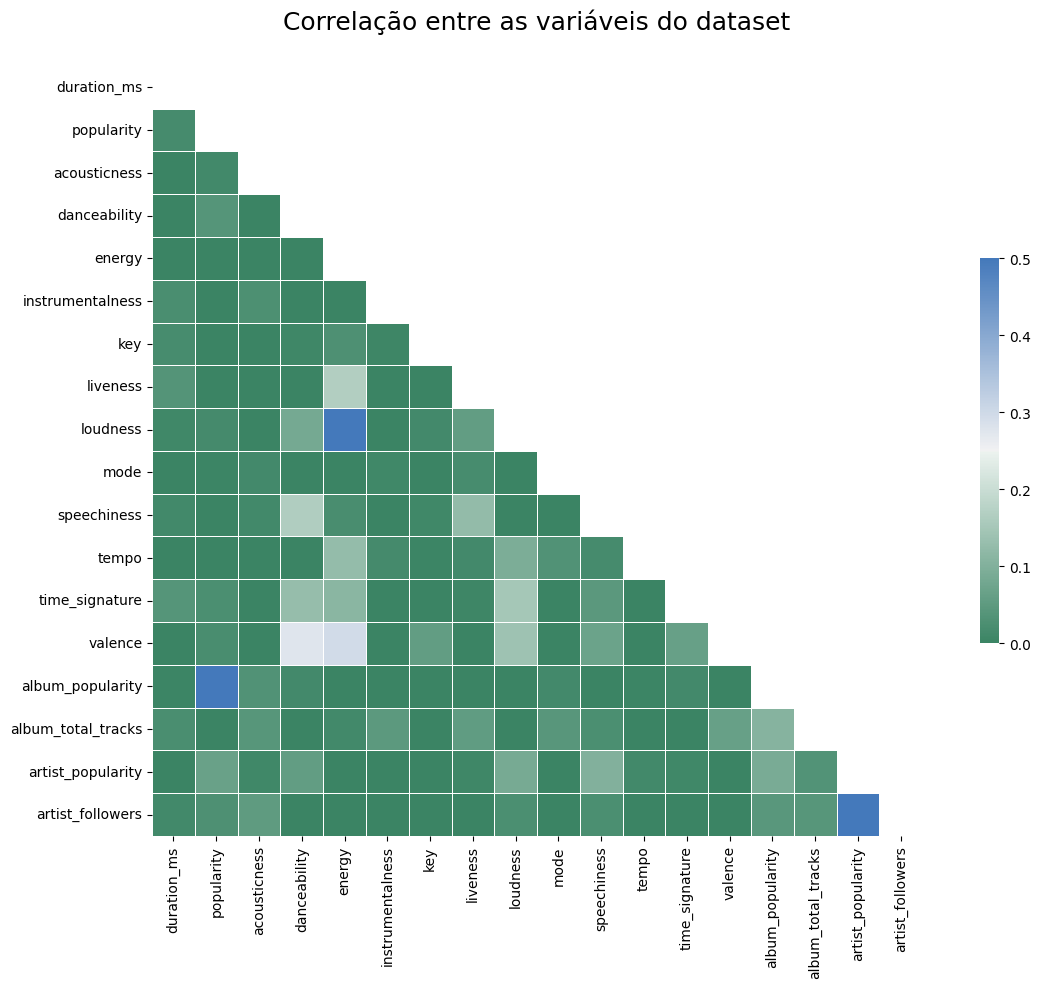

In [177]:
plt.figure(figsize=(15, 10))

colunas_nao_usadas = ['explicit']

mask = np.triu(np.ones_like(df_musicas.drop(columns=colunas_nao_usadas).corr(), dtype=bool))
cmap = sns.diverging_palette(150, 250, as_cmap=True)

sns.heatmap(
    df_musicas.drop(columns=colunas_nao_usadas).corr(), 
    mask=mask,
    square=True,
    vmin=0, 
    vmax=.5, 
    cmap=cmap,
    linewidths=.5,
    # annot=True,

    # fmt='.2f',
    cbar_kws={"shrink": .5}
    )

plt.title('Correlação entre as variáveis do dataset\n', fontsize=18)
plt.show()

Com base nesse mapa de calor, nota-se que, naturalmente, a coluna de "album_popularity" (popularidade do album daquela música) está altamente correlacionada (92%) com "popularity" (popularidade da música). Da mesma forma que "artist_followers" (seguidores do artista) possui uma correlação de 65% com "artist_popularity" (popularidade do artista), o que também é esperado.

Além disso, é interessante notar que as seguintes _feature_ apresentaram certo grau de correlação

- loudness x energy (68%)
- valence x danceability (28%)
- valence x energy (30%)
- valence x loudness (14%)

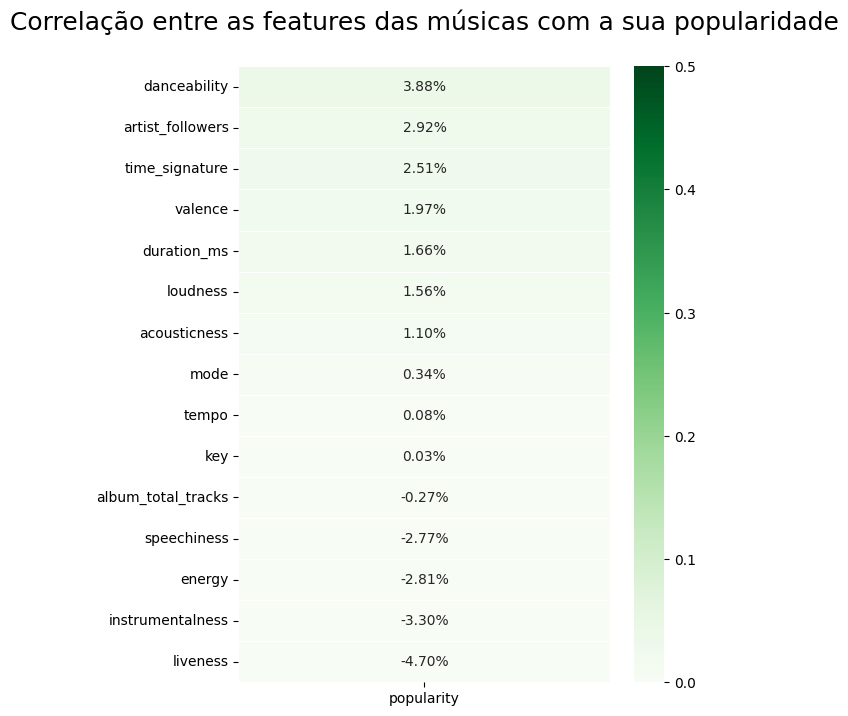

In [176]:
plt.figure(figsize=(6, 8))

sns.heatmap(
    df_musicas.drop(columns=['explicit', 'album_popularity', 'artist_popularity']).corr()[['popularity']].sort_values(by=['popularity'], ascending=False)[1:],

    annot=True, 
    vmin=0, 
    vmax=.5, 
    cmap='Greens',
    linewidths=.5,
    fmt='.2%'
    )


plt.title('Correlação entre as features das músicas com a sua popularidade\n', fontsize=18)
plt.show()

Análisando o gráfico acima, onde procurou encontrar alguma correlação entre as características da música e sua popularidade, nota-se que não há nenhuma regra geral para produzir uma música popular - todas as features apresentaram correlações próximas a zero.

In [114]:
generos_artistas = df_musicas['artist_genres'].unique()
print('Gêneros de artistas:', len(generos_artistas)	)
print(generos_artistas)

Gêneros de artistas: 7
['hip hop' 'r&b' 'rap' 'pop' 'rock' 'punk' 'reggae']


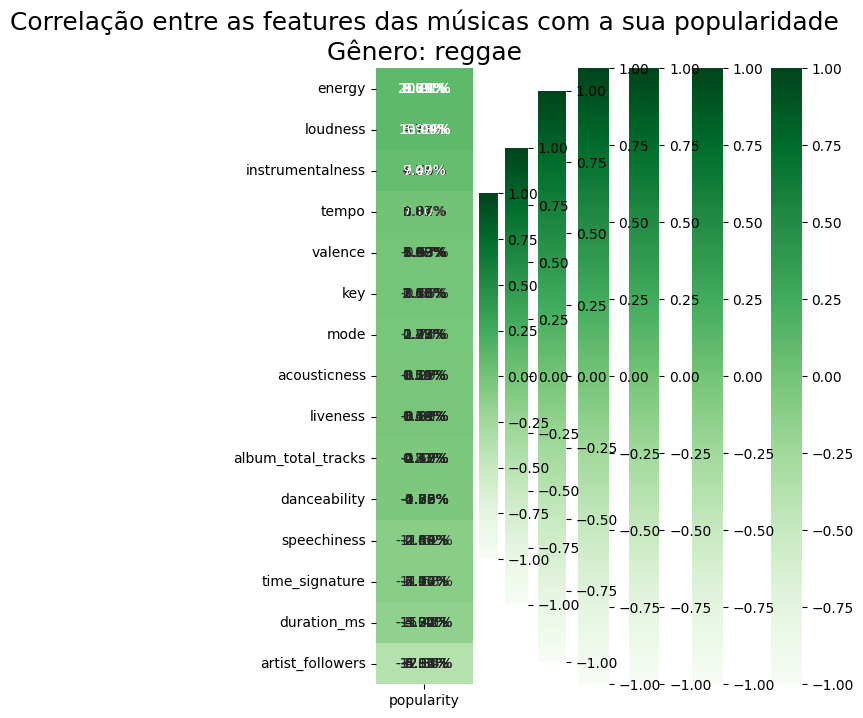

In [117]:
plt.figure(figsize=(6, 8))

for genero in generos_artistas:
    df_genero = df_musicas[df_musicas['artist_genres'] == genero]
    sns.heatmap(
        df_genero.drop(columns=['explicit', 'album_popularity', 'artist_popularity']).corr()[['popularity']].sort_values(by=['popularity'], ascending=False)[1:], 
        annot=True, 
        vmin=-1, 
        vmax=1, 
        cmap='Greens', 
        fmt='.2%'
        )
    
    plt.title(f'Correlação entre as features das músicas com a sua popularidade\nGênero: {genero}', fontsize=18)



#     sns.kdeplot(df_genero['popularity'], label=genero)

# plt.title('Distribuição da popularidade das músicas por gênero', fontsize=18)
# plt.xlabel('Popularidade', fontsize=14)
# plt.ylabel('Densidade', fontsize=14)
# plt.legend(fontsize=12)
# plt.show()


# sns.heatmap(
#     df_musicas.drop(columns=['explicit', 'album_popularity', 'artist_popularity']).corr()[['popularity']].sort_values(by=['popularity'], ascending=False)[1:],

#     annot=True, 
#     vmin=-1, 
#     vmax=1, 
#     cmap='Greens', 
#     fmt='.2%'
#     )

# plt.title('Correlação entre as features das músicas com a sua popularidade', fontsize=18)
# plt.show()